![Facial Recognition](facialrecognition.jpg)

You are a member of an elite group of data scientists, specialising in advanced facial recognition technology, this firm is dedicated to identifying and safeguarding prominent individuals from various spheres—ranging from entertainment and sports to politics and philanthropy. The team's mission is to deploy AI-driven solutions that can accurately distinguish between images of notable personalities and the general populace, enhancing the personal security of such high-profile individuals. You're to focus on Arnold Schwarzenegger, a figure whose accomplishments span from bodybuilding champion to Hollywood icon, and from philanthropist to the Governor of California. 

### **The Data**
The `data/lfw_arnie_nonarnie.csv` dataset contains processed facial image data derived from the "Labeled Faces in the Wild" (LFW) dataset, focusing specifically on images of Arnold Schwarzenegger and other individuals not identified as him. This dataset has been prepared to aid in the development and evaluation of facial recognition models. There are 40 images of Arnold Schwarzenegger and 150 of other people.

| Column Name | Description |
|-------------|-------------|
| PC1, PC2, ... PCN | Principal components from PCA, capturing key image features. |
| Label | Binary indicator: `1` for Arnold Schwarzenegger, `0` for others. |

In [28]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file 
df = pd.read_csv("data/lfw_arnie_nonarnie.csv")

# Seperate the predictor and class label
X = df.drop('Label', axis=1)
y = df['Label'] 

# Split the data into training and testing sets using stratify to balance the class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

In [29]:
#Import more requied libraries 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Initialize machine learning pipelines for KNN, Logistic Regression, and Random Forest
models = {
    'KNN': Pipeline([
        ('scaler', StandardScaler()), 
        ('knn', KNeighborsClassifier())
    ]),
    
    'Logistic Regression': Pipeline([
        ('scaler', StandardScaler()), 
        ('logreg', LogisticRegression())
    ]),
    
    'Random Forest': Pipeline([
        ('scaler', StandardScaler()), 
        ('rf', RandomForestClassifier())
    ])
}

# Print out the initialized models dictionary
print(models)

{'KNN': Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())]), 'Logistic Regression': Pipeline(steps=[('scaler', StandardScaler()), ('logreg', LogisticRegression())]), 'Random Forest': Pipeline(steps=[('scaler', StandardScaler()), ('rf', RandomForestClassifier())])}


In [30]:
# Import required libraries for cross-validation
from sklearn.model_selection import cross_val_score

# Initialize variables to store the best model information
best_model_name = None
best_model_info = None
best_model_cv_score = 0

# Perform cross-validation for each model and determine the best model
for model_name, model in models.items():
    # Perform 5-fold cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    
    # Calculate the mean cross-validation score
    mean_cv_score = cv_scores.mean()
    
    # Print the mean cross-validation score for each model
    print(f"{model_name} CV Score: {mean_cv_score:.4f}")
    
    # Check if this is the best model so far
    if mean_cv_score > best_model_cv_score:
        best_model_name = model_name
        best_model_info = model.get_params()  # Store the model parameters
        best_model_cv_score = mean_cv_score

# Output the best model's details
print(f"\nBest Model: {best_model_name}")
print(f"Best Model Parameters: {best_model_info}")
print(f"Best Cross-Validation Score: {best_model_cv_score:.4f}")

KNN CV Score: 0.7897
Logistic Regression CV Score: 0.8222
Random Forest CV Score: 0.7897

Best Model: Logistic Regression
Best Model Parameters: {'memory': None, 'steps': [('scaler', StandardScaler()), ('logreg', LogisticRegression())], 'verbose': False, 'scaler': StandardScaler(), 'logreg': LogisticRegression(), 'scaler__copy': True, 'scaler__with_mean': True, 'scaler__with_std': True, 'logreg__C': 1.0, 'logreg__class_weight': None, 'logreg__dual': False, 'logreg__fit_intercept': True, 'logreg__intercept_scaling': 1, 'logreg__l1_ratio': None, 'logreg__max_iter': 100, 'logreg__multi_class': 'deprecated', 'logreg__n_jobs': None, 'logreg__penalty': 'l2', 'logreg__random_state': None, 'logreg__solver': 'lbfgs', 'logreg__tol': 0.0001, 'logreg__verbose': 0, 'logreg__warm_start': False}
Best Cross-Validation Score: 0.8222


In [31]:
# Initialize variable to store the best accuracy score
score = 0

# Train the best model on the full training data
best_model = models[best_model_name]
best_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_model.predict(X_test)

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Check if the accuracy is at least 80%
if accuracy >= 0.80:
    score = accuracy

# Output the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Best Accuracy Score (>=80%): {score:.4f}")

Accuracy: 0.8158
Precision: 1.0000
Recall: 0.1250
F1 Score: 0.2222
Best Accuracy Score (>=80%): 0.8158


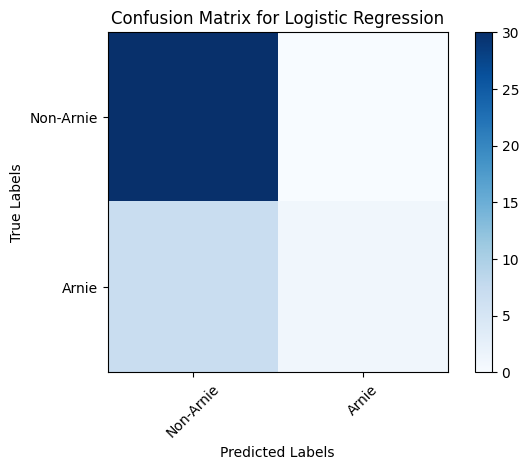

In [32]:
# This helps in understanding how well the model is predicting each class
conf_mat = confusion_matrix(y_test, y_pred)
plt.imshow(conf_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix for {best_model_name}')
plt.colorbar()
tick_marks = range(len(set(y_test)))
plt.xticks(tick_marks, ['Non-Arnie', 'Arnie'], rotation=45)
plt.yticks(tick_marks, ['Non-Arnie', 'Arnie'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.tight_layout()
plt.show()